# CIA Country Clustering - Unsupervised Machine Learning

The dataset is from [Kaggle](https://www.kaggle.com/datasets/abhishek252/cia-country-dataset-for-unsupervised-learning) and originates from the CIA World Factbook which contains information relating to the human and physical geography for each country around the world. The main objective of the analysis is to determine whether the human and physical geographic features of each country are indicative of the regions that they are located in. Multiple clustering algorithms will be employed in order to find which model performs the best. After the training and testing of the models, conclusions will be made in order to understand why the models produce certain results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Data Preprocessing

In [2]:
# Read raw data
data = pd.read_csv('CIA_Country_Facts.csv')
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
# Remove white space from each entry in column
data['Region'] = data['Region'].str.rstrip()

In [4]:
data.shape

(227, 20)

In [5]:
data.info

<bound method DataFrame.info of             Country                Region  Population  Area (sq. mi.)  \
0       Afghanistan  ASIA (EX. NEAR EAST)    31056997          647500   
1           Albania        EASTERN EUROPE     3581655           28748   
2           Algeria       NORTHERN AFRICA    32930091         2381740   
3    American Samoa               OCEANIA       57794             199   
4           Andorra        WESTERN EUROPE       71201             468   
..              ...                   ...         ...             ...   
222       West Bank             NEAR EAST     2460492            5860   
223  Western Sahara       NORTHERN AFRICA      273008          266000   
224           Yemen             NEAR EAST    21456188          527970   
225          Zambia    SUB-SAHARAN AFRICA    11502010          752614   
226        Zimbabwe    SUB-SAHARAN AFRICA    12236805          390580   

     Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0          

In [6]:
data.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [7]:
data.isnull().sum().sort_values()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
GDP ($ per capita)                     1
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Net migration                          3
Infant mortality (per 1000 births)     3
Birthrate                              3
Phones (per 1000)                      4
Deathrate                              4
Agriculture                           15
Service                               15
Industry                              16
Literacy (%)                          18
Climate                               22
dtype: int64

In [8]:
# Drop all rows with missing values
data.dropna(inplace=True)
data.isnull().sum().all() == 0

True

In [9]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [10]:
data[['Population', 'Area (sq. mi.)']] = data[['Population', 'Area (sq. mi.)']].astype('float64') 

In [11]:
data.dtypes

Country                                object
Region                                 object
Population                            float64
Area (sq. mi.)                        float64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

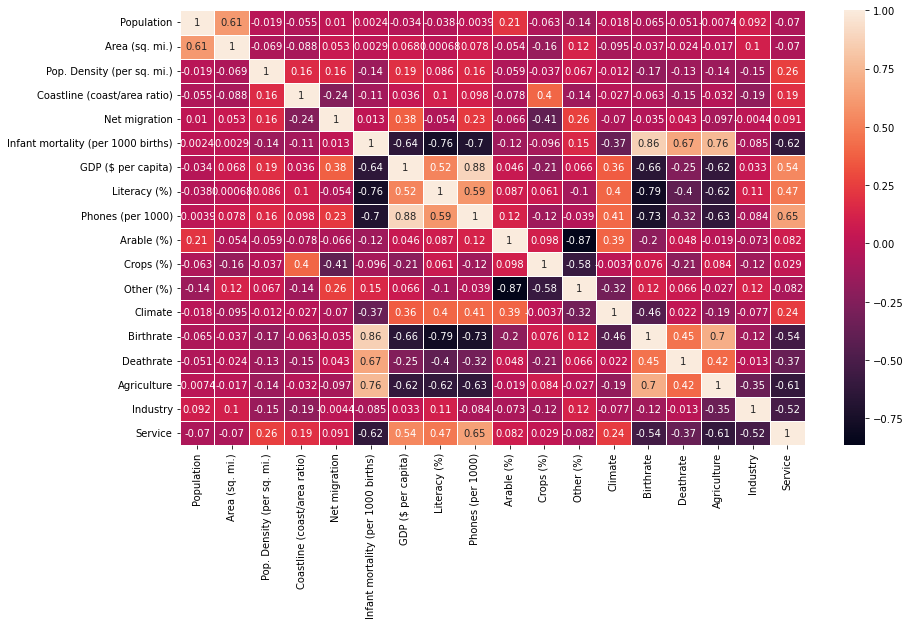

In [12]:
# Visualize correlation matrix
corr = data.corr()
fig = plt.subplots(figsize = (14, 8))
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            linewidth=0.5);

In [13]:
data['Region'].value_counts()

SUB-SAHARAN AFRICA      47
LATIN AMER. & CARIB     42
ASIA (EX. NEAR EAST)    26
WESTERN EUROPE          17
OCEANIA                 12
NEAR EAST               12
C.W. OF IND. STATES     10
EASTERN EUROPE           6
NORTHERN AFRICA          3
NORTHERN AMERICA         2
BALTICS                  2
Name: Region, dtype: int64

## Feature Transformation

In [14]:
# Filter out categorical data in order to use for training models
feature_columns = data.drop(['Country', 'Region'], axis=1).columns.tolist()
feature_columns

['Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

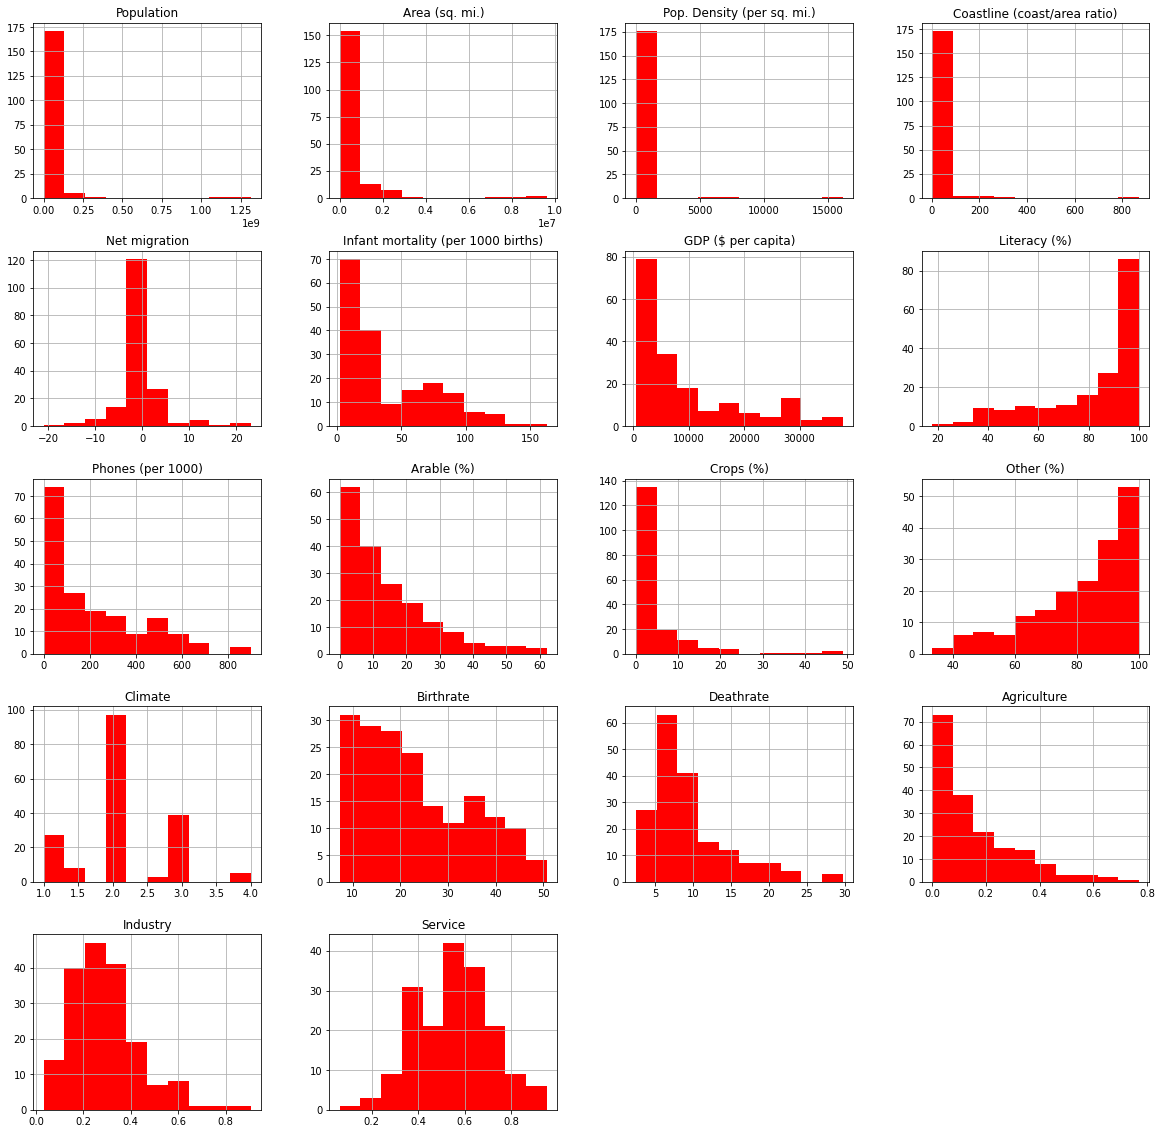

In [15]:
# Visualize histogram to look for skewed data
data[feature_columns].hist(figsize = (20,20), color = 'r');

In [16]:
# Find features that would generally be considered as skewed
skewed_accumulator = []
skew = data[feature_columns].skew()

def find_skewed_columns(df_columns):
    for column, value in zip(skew.index, skew.values):
        if value > 0.75:
            skewed_accumulator.append(column)
    return skewed_accumulator 

In [17]:
skewed_columns = find_skewed_columns(skew)
skewed_columns

['Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Deathrate',
 'Agriculture',
 'Industry']

In [18]:
# Apply log transformation to skewed columns
skewed_transformed = data[skewed_columns].apply(lambda x: np.log(x + 1))

data[skewed_columns] = skewed_transformed[skewed_columns]
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),17.251335,13.380876,3.891820,0.000000,23.06,5.100293,6.552508,36.0,1.435085,2.574900,0.198851,87.65,1.0,46.60,3.060583,0.322083,0.215111,0.380
1,Albania,EASTERN EUROPE,15.091336,10.266358,4.833102,0.815365,-4.93,3.114404,8.412055,86.5,4.279440,3.095125,1.690096,74.49,3.0,15.11,1.827770,0.208639,0.172271,0.579
2,Algeria,NORTHERN AFRICA,17.309897,14.683342,2.694627,0.039221,-0.39,3.465736,8.699681,70.0,4.370713,1.439835,0.223144,96.53,1.0,17.14,1.724551,0.096219,0.470004,0.298
6,Anguilla,LATIN AMER. & CARIB,9.508814,4.634729,4.891101,4.107590,10.76,3.092405,9.059634,95.0,6.133398,0.000000,0.000000,100.00,2.0,14.17,1.846879,0.039221,0.165514,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,11.143440,6.095825,5.056246,3.570659,-6.15,3.018472,9.305741,89.0,6.311553,2.953868,1.713798,77.27,2.0,16.93,1.851599,0.037296,0.198851,0.743


In [19]:
# Apply min-max scaler for standardization as clustering algorithms are subject to outlying data
mms = MinMaxScaler()
for col in data[feature_columns].columns:
    data[col] = mms.fit_transform(data[[col]])
    
data[feature_columns].head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.673995,0.787649,0.330426,0.000000,1.000000,1.000000,0.077692,0.223301,0.189269,0.621224,0.050841,0.814759,0.000000,0.904926,0.834013,0.564648,0.299283,0.356502
1,0.485965,0.542667,0.439092,0.120431,0.364586,0.492023,0.507796,0.836165,0.618997,0.746735,0.432114,0.617369,0.666667,0.180018,0.273351,0.365767,0.229455,0.579596
2,0.679093,0.890099,0.192216,0.005793,0.467650,0.581891,0.574323,0.635922,0.632787,0.347377,0.057052,0.947953,0.000000,0.226750,0.226408,0.168682,0.714750,0.264574
6,0.000000,0.099694,0.445787,0.606698,0.720772,0.486396,0.657578,0.939320,0.899095,0.000000,0.000000,1.000000,0.333333,0.158379,0.282041,0.068758,0.218442,0.804933
7,0.142296,0.214621,0.464853,0.527393,0.336890,0.467484,0.714501,0.866505,0.926011,0.712655,0.438174,0.659067,0.333333,0.221915,0.284188,0.065384,0.272779,0.763453


## Training and Testing Models

- Train using K-Means, Ward-Linkage Agglomerative, and Complete-Linkage Agglomerative models
- Produce dataframes with the country, region, and corresponding cluster for each model
- Visualize region similarities across each cluster for each of the models

### K-Means Clustering Model

In [20]:
# Use 11 clusters since there are 11 total regions in the dataset
n_clusters = len(data['Region'].unique())
n_clusters

11

In [21]:
km = KMeans(n_clusters=n_clusters, random_state=123)
km = km.fit(data[feature_columns].values)

data['kmeans'] = km.predict(data[feature_columns].values)

In [22]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,kmeans
0,Afghanistan,ASIA (EX. NEAR EAST),0.673995,0.787649,0.330426,0.000000,1.000000,1.000000,0.077692,0.223301,...,0.621224,0.050841,0.814759,0.000000,0.904926,0.834013,0.564648,0.299283,0.356502,7
1,Albania,EASTERN EUROPE,0.485965,0.542667,0.439092,0.120431,0.364586,0.492023,0.507796,0.836165,...,0.746735,0.432114,0.617369,0.666667,0.180018,0.273351,0.365767,0.229455,0.579596,2
2,Algeria,NORTHERN AFRICA,0.679093,0.890099,0.192216,0.005793,0.467650,0.581891,0.574323,0.635922,...,0.347377,0.057052,0.947953,0.000000,0.226750,0.226408,0.168682,0.714750,0.264574,0
6,Anguilla,LATIN AMER. & CARIB,0.000000,0.099694,0.445787,0.606698,0.720772,0.486396,0.657578,0.939320,...,0.000000,0.000000,1.000000,0.333333,0.158379,0.282041,0.068758,0.218442,0.804933,4
7,Antigua & Barbuda,LATIN AMER. & CARIB,0.142296,0.214621,0.464853,0.527393,0.336890,0.467484,0.714501,0.866505,...,0.712655,0.438174,0.659067,0.333333,0.221915,0.284188,0.065384,0.272779,0.763453,8


In [23]:
# Create dataframes to display countries in each cluster and show the value counts of the regions in each cluster
def cluster_finder(model):
    cluster_max = []
    
    for index in range(0, 11):
        display(data[['Country', 'Region', model]][data[model] == index])
        display(data['Region'][data[model] == index].value_counts())
        cluster_max.append(f'{data["Region"][data[model] == index].value_counts().index[0]}, {data["Region"][data[model] == index].value_counts(normalize=True)[0]}')
    return cluster_max

kmeans_clusters = cluster_finder('kmeans')

,Country,Region,kmeans
2,Algeria,NORTHERN AFRICA,0
8,Argentina,LATIN AMER. & CARIB,0
11,Australia,OCEANIA,0
27,Brazil,LATIN AMER. & CARIB,0
41,Chile,LATIN AMER. & CARIB,0
42,China,ASIA (EX. NEAR EAST),0
43,Colombia,LATIN AMER. & CARIB,0
60,Egypt,NORTHERN AFRICA,0
88,Guyana,LATIN AMER. & CARIB,0
96,Iran,ASIA (EX. NEAR EAST),0


LATIN AMER. & CARIB     10
NORTHERN AFRICA          2
ASIA (EX. NEAR EAST)     2
OCEANIA                  1
C.W. OF IND. STATES      1
SUB-SAHARAN AFRICA       1
Name: Region, dtype: int64

,Country,Region,kmeans
24,Bolivia,LATIN AMER. & CARIB,1
26,Botswana,SUB-SAHARAN AFRICA,1
46,"Congo, Repub. of the",SUB-SAHARAN AFRICA,1
55,Djibouti,SUB-SAHARAN AFRICA,1
62,Equatorial Guinea,SUB-SAHARAN AFRICA,1
63,Eritrea,SUB-SAHARAN AFRICA,1
72,Gabon,SUB-SAHARAN AFRICA,1
97,Iraq,NEAR EAST,1
107,Kenya,SUB-SAHARAN AFRICA,1
116,Lesotho,SUB-SAHARAN AFRICA,1


SUB-SAHARAN AFRICA      12
C.W. OF IND. STATES      3
NEAR EAST                2
LATIN AMER. & CARIB      1
ASIA (EX. NEAR EAST)     1
OCEANIA                  1
Name: Region, dtype: int64

,Country,Region,kmeans
1,Albania,EASTERN EUROPE,2
13,Azerbaijan,C.W. OF IND. STATES,2
20,Belize,LATIN AMER. & CARIB,2
37,Cape Verde,SUB-SAHARAN AFRICA,2
48,Costa Rica,LATIN AMER. & CARIB,2
57,Dominican Republic,LATIN AMER. & CARIB,2
59,Ecuador,LATIN AMER. & CARIB,2
61,El Salvador,LATIN AMER. & CARIB,2
75,Georgia,C.W. OF IND. STATES,2
84,Guatemala,LATIN AMER. & CARIB,2


LATIN AMER. & CARIB     9
ASIA (EX. NEAR EAST)    6
C.W. OF IND. STATES     3
EASTERN EUROPE          1
SUB-SAHARAN AFRICA      1
NEAR EAST               1
NORTHERN AFRICA         1
OCEANIA                 1
Name: Region, dtype: int64

,Country,Region,kmeans
9,Armenia,C.W. OF IND. STATES,3
18,Belarus,C.W. OF IND. STATES,3
30,Bulgaria,EASTERN EUROPE,3
51,Cuba,LATIN AMER. & CARIB,3
53,Czech Republic,EASTERN EUROPE,3
92,Hungary,EASTERN EUROPE,3
163,Poland,EASTERN EUROPE,3
168,Romania,EASTERN EUROPE,3
190,Spain,WESTERN EUROPE,3
201,Thailand,ASIA (EX. NEAR EAST),3


EASTERN EUROPE          5
C.W. OF IND. STATES     3
LATIN AMER. & CARIB     1
WESTERN EUROPE          1
ASIA (EX. NEAR EAST)    1
NEAR EAST               1
Name: Region, dtype: int64

,Country,Region,kmeans
6,Anguilla,LATIN AMER. & CARIB,4
10,Aruba,LATIN AMER. & CARIB,4
14,"Bahamas, The",LATIN AMER. & CARIB,4
22,Bermuda,NORTHERN AMERICA,4
38,Cayman Islands,LATIN AMER. & CARIB,4
71,French Polynesia,OCEANIA,4
91,Hong Kong,ASIA (EX. NEAR EAST),4
93,Iceland,WESTERN EUROPE,4
122,Macau,ASIA (EX. NEAR EAST),4
147,Netherlands Antilles,LATIN AMER. & CARIB,4


LATIN AMER. & CARIB     5
ASIA (EX. NEAR EAST)    3
OCEANIA                 2
NORTHERN AMERICA        1
WESTERN EUROPE          1
Name: Region, dtype: int64

,Country,Region,kmeans
12,Austria,WESTERN EUROPE,5
19,Belgium,WESTERN EUROPE,5
54,Denmark,WESTERN EUROPE,5
64,Estonia,BALTICS,5
68,Finland,WESTERN EUROPE,5
69,France,WESTERN EUROPE,5
76,Germany,WESTERN EUROPE,5
79,Greece,WESTERN EUROPE,5
98,Ireland,WESTERN EUROPE,5
100,Israel,NEAR EAST,5


WESTERN EUROPE          15
ASIA (EX. NEAR EAST)     3
BALTICS                  2
NEAR EAST                1
OCEANIA                  1
NORTHERN AMERICA         1
LATIN AMER. & CARIB      1
Name: Region, dtype: int64

,Country,Region,kmeans
56,Dominica,LATIN AMER. & CARIB,6
81,Grenada,LATIN AMER. & CARIB,6
127,Maldives,ASIA (EX. NEAR EAST),6
130,Marshall Islands,OCEANIA,6
136,"Micronesia, Fed. St.",OCEANIA,6
175,Saint Vincent and the Grenadines,LATIN AMER. & CARIB,6
176,Samoa,OCEANIA,6
178,Sao Tome & Principe,SUB-SAHARAN AFRICA,6
203,Tonga,OCEANIA,6


OCEANIA                 4
LATIN AMER. & CARIB     3
ASIA (EX. NEAR EAST)    1
SUB-SAHARAN AFRICA      1
Name: Region, dtype: int64

,Country,Region,kmeans
0,Afghanistan,ASIA (EX. NEAR EAST),7
23,Bhutan,ASIA (EX. NEAR EAST),7
31,Burkina Faso,SUB-SAHARAN AFRICA,7
35,Cameroon,SUB-SAHARAN AFRICA,7
39,Central African Rep.,SUB-SAHARAN AFRICA,7
40,Chad,SUB-SAHARAN AFRICA,7
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,7
65,Ethiopia,SUB-SAHARAN AFRICA,7
86,Guinea,SUB-SAHARAN AFRICA,7
87,Guinea-Bissau,SUB-SAHARAN AFRICA,7


SUB-SAHARAN AFRICA      18
ASIA (EX. NEAR EAST)     3
Name: Region, dtype: int64

,Country,Region,kmeans
7,Antigua & Barbuda,LATIN AMER. & CARIB,8
15,Bahrain,NEAR EAST,8
17,Barbados,LATIN AMER. & CARIB,8
28,British Virgin Is.,LATIN AMER. & CARIB,8
67,Fiji,OCEANIA,8
82,Guadeloupe,LATIN AMER. & CARIB,8
102,Jamaica,LATIN AMER. & CARIB,8
131,Martinique,LATIN AMER. & CARIB,8
133,Mauritius,SUB-SAHARAN AFRICA,8
157,Palau,OCEANIA,8


LATIN AMER. & CARIB    10
SUB-SAHARAN AFRICA      3
OCEANIA                 2
NEAR EAST               1
Name: Region, dtype: int64

,Country,Region,kmeans
29,Brunei,ASIA (EX. NEAR EAST),9
70,French Guiana,LATIN AMER. & CARIB,9
105,Jordan,NEAR EAST,9
111,Kuwait,NEAR EAST,9
155,Oman,NEAR EAST,9
166,Qatar,NEAR EAST,9
179,Saudi Arabia,NEAR EAST,9
212,United Arab Emirates,NEAR EAST,9


NEAR EAST               6
ASIA (EX. NEAR EAST)    1
LATIN AMER. & CARIB     1
Name: Region, dtype: int64

,Country,Region,kmeans
16,Bangladesh,ASIA (EX. NEAR EAST),10
21,Benin,SUB-SAHARAN AFRICA,10
32,Burma,ASIA (EX. NEAR EAST),10
33,Burundi,SUB-SAHARAN AFRICA,10
34,Cambodia,ASIA (EX. NEAR EAST),10
44,Comoros,SUB-SAHARAN AFRICA,10
49,Cote d'Ivoire,SUB-SAHARAN AFRICA,10
73,"Gambia, The",SUB-SAHARAN AFRICA,10
77,Ghana,SUB-SAHARAN AFRICA,10
89,Haiti,LATIN AMER. & CARIB,10


SUB-SAHARAN AFRICA      11
ASIA (EX. NEAR EAST)     5
LATIN AMER. & CARIB      1
Name: Region, dtype: int64

### Ward-Linkage Agglomerative Clustering Model

In [24]:
wag = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', compute_full_tree=True)
wag.fit(data[feature_columns])
data['ward_agglom'] = wag.fit_predict(data[feature_columns])

In [25]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,kmeans,ward_agglom
0,Afghanistan,ASIA (EX. NEAR EAST),0.673995,0.787649,0.330426,0.000000,1.000000,1.000000,0.077692,0.223301,...,0.050841,0.814759,0.000000,0.904926,0.834013,0.564648,0.299283,0.356502,7,6
1,Albania,EASTERN EUROPE,0.485965,0.542667,0.439092,0.120431,0.364586,0.492023,0.507796,0.836165,...,0.432114,0.617369,0.666667,0.180018,0.273351,0.365767,0.229455,0.579596,2,4
2,Algeria,NORTHERN AFRICA,0.679093,0.890099,0.192216,0.005793,0.467650,0.581891,0.574323,0.635922,...,0.057052,0.947953,0.000000,0.226750,0.226408,0.168682,0.714750,0.264574,0,3
6,Anguilla,LATIN AMER. & CARIB,0.000000,0.099694,0.445787,0.606698,0.720772,0.486396,0.657578,0.939320,...,0.000000,1.000000,0.333333,0.158379,0.282041,0.068758,0.218442,0.804933,4,9
7,Antigua & Barbuda,LATIN AMER. & CARIB,0.142296,0.214621,0.464853,0.527393,0.336890,0.467484,0.714501,0.866505,...,0.438174,0.659067,0.333333,0.221915,0.284188,0.065384,0.272779,0.763453,8,8


In [26]:
wagg_clusters = cluster_finder('ward_agglom')

,Country,Region,ward_agglom
13,Azerbaijan,C.W. OF IND. STATES,0
32,Burma,ASIA (EX. NEAR EAST),0
34,Cambodia,ASIA (EX. NEAR EAST),0
35,Cameroon,SUB-SAHARAN AFRICA,0
46,"Congo, Repub. of the",SUB-SAHARAN AFRICA,0
55,Djibouti,SUB-SAHARAN AFRICA,0
62,Equatorial Guinea,SUB-SAHARAN AFRICA,0
63,Eritrea,SUB-SAHARAN AFRICA,0
72,Gabon,SUB-SAHARAN AFRICA,0
77,Ghana,SUB-SAHARAN AFRICA,0


SUB-SAHARAN AFRICA      16
C.W. OF IND. STATES      3
ASIA (EX. NEAR EAST)     3
LATIN AMER. & CARIB      3
NEAR EAST                2
OCEANIA                  1
Name: Region, dtype: int64

,Country,Region,ward_agglom
8,Argentina,LATIN AMER. & CARIB,1
12,Austria,WESTERN EUROPE,1
18,Belarus,C.W. OF IND. STATES,1
19,Belgium,WESTERN EUROPE,1
30,Bulgaria,EASTERN EUROPE,1
41,Chile,LATIN AMER. & CARIB,1
53,Czech Republic,EASTERN EUROPE,1
54,Denmark,WESTERN EUROPE,1
64,Estonia,BALTICS,1
68,Finland,WESTERN EUROPE,1


WESTERN EUROPE          16
EASTERN EUROPE           5
LATIN AMER. & CARIB      3
C.W. OF IND. STATES      3
ASIA (EX. NEAR EAST)     3
BALTICS                  2
NEAR EAST                1
OCEANIA                  1
NORTHERN AMERICA         1
Name: Region, dtype: int64

,Country,Region,ward_agglom
14,"Bahamas, The",LATIN AMER. & CARIB,2
20,Belize,LATIN AMER. & CARIB,2
37,Cape Verde,SUB-SAHARAN AFRICA,2
67,Fiji,OCEANIA,2
70,French Guiana,LATIN AMER. & CARIB,2
93,Iceland,WESTERN EUROPE,2
148,New Caledonia,OCEANIA,2
158,Panama,LATIN AMER. & CARIB,2
193,Suriname,LATIN AMER. & CARIB,2
217,Vanuatu,OCEANIA,2


LATIN AMER. & CARIB    5
OCEANIA                3
SUB-SAHARAN AFRICA     1
WESTERN EUROPE         1
Name: Region, dtype: int64

,Country,Region,ward_agglom
2,Algeria,NORTHERN AFRICA,3
11,Australia,OCEANIA,3
24,Bolivia,LATIN AMER. & CARIB,3
26,Botswana,SUB-SAHARAN AFRICA,3
27,Brazil,LATIN AMER. & CARIB,3
43,Colombia,LATIN AMER. & CARIB,3
59,Ecuador,LATIN AMER. & CARIB,3
60,Egypt,NORTHERN AFRICA,3
88,Guyana,LATIN AMER. & CARIB,3
96,Iran,ASIA (EX. NEAR EAST),3


LATIN AMER. & CARIB     9
SUB-SAHARAN AFRICA      3
NEAR EAST               3
NORTHERN AFRICA         2
ASIA (EX. NEAR EAST)    2
C.W. OF IND. STATES     2
OCEANIA                 1
Name: Region, dtype: int64

,Country,Region,ward_agglom
1,Albania,EASTERN EUROPE,4
9,Armenia,C.W. OF IND. STATES,4
42,China,ASIA (EX. NEAR EAST),4
51,Cuba,LATIN AMER. & CARIB,4
57,Dominican Republic,LATIN AMER. & CARIB,4
61,El Salvador,LATIN AMER. & CARIB,4
75,Georgia,C.W. OF IND. STATES,4
95,Indonesia,ASIA (EX. NEAR EAST),4
102,Jamaica,LATIN AMER. & CARIB,4
109,"Korea, North",ASIA (EX. NEAR EAST),4


ASIA (EX. NEAR EAST)    8
LATIN AMER. & CARIB     5
C.W. OF IND. STATES     2
EASTERN EUROPE          1
OCEANIA                 1
NORTHERN AFRICA         1
NEAR EAST               1
Name: Region, dtype: int64

,Country,Region,ward_agglom
44,Comoros,SUB-SAHARAN AFRICA,5
127,Maldives,ASIA (EX. NEAR EAST),5
130,Marshall Islands,OCEANIA,5
136,"Micronesia, Fed. St.",OCEANIA,5
178,Sao Tome & Principe,SUB-SAHARAN AFRICA,5
203,Tonga,OCEANIA,5


OCEANIA                 3
SUB-SAHARAN AFRICA      2
ASIA (EX. NEAR EAST)    1
Name: Region, dtype: int64

,Country,Region,ward_agglom
0,Afghanistan,ASIA (EX. NEAR EAST),6
23,Bhutan,ASIA (EX. NEAR EAST),6
31,Burkina Faso,SUB-SAHARAN AFRICA,6
39,Central African Rep.,SUB-SAHARAN AFRICA,6
40,Chad,SUB-SAHARAN AFRICA,6
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,6
65,Ethiopia,SUB-SAHARAN AFRICA,6
86,Guinea,SUB-SAHARAN AFRICA,6
87,Guinea-Bissau,SUB-SAHARAN AFRICA,6
117,Liberia,SUB-SAHARAN AFRICA,6


SUB-SAHARAN AFRICA      13
ASIA (EX. NEAR EAST)     2
Name: Region, dtype: int64

,Country,Region,ward_agglom
16,Bangladesh,ASIA (EX. NEAR EAST),7
21,Benin,SUB-SAHARAN AFRICA,7
33,Burundi,SUB-SAHARAN AFRICA,7
49,Cote d'Ivoire,SUB-SAHARAN AFRICA,7
73,"Gambia, The",SUB-SAHARAN AFRICA,7
89,Haiti,LATIN AMER. & CARIB,7
94,India,ASIA (EX. NEAR EAST),7
97,Iraq,NEAR EAST,7
125,Malawi,SUB-SAHARAN AFRICA,7
152,Nigeria,SUB-SAHARAN AFRICA,7


SUB-SAHARAN AFRICA      9
ASIA (EX. NEAR EAST)    3
LATIN AMER. & CARIB     1
NEAR EAST               1
Name: Region, dtype: int64

,Country,Region,ward_agglom
7,Antigua & Barbuda,LATIN AMER. & CARIB,8
17,Barbados,LATIN AMER. & CARIB,8
28,British Virgin Is.,LATIN AMER. & CARIB,8
56,Dominica,LATIN AMER. & CARIB,8
81,Grenada,LATIN AMER. & CARIB,8
82,Guadeloupe,LATIN AMER. & CARIB,8
131,Martinique,LATIN AMER. & CARIB,8
133,Mauritius,SUB-SAHARAN AFRICA,8
157,Palau,OCEANIA,8
167,Reunion,SUB-SAHARAN AFRICA,8


LATIN AMER. & CARIB    10
SUB-SAHARAN AFRICA      3
OCEANIA                 1
Name: Region, dtype: int64

,Country,Region,ward_agglom
6,Anguilla,LATIN AMER. & CARIB,9
10,Aruba,LATIN AMER. & CARIB,9
22,Bermuda,NORTHERN AMERICA,9
38,Cayman Islands,LATIN AMER. & CARIB,9
91,Hong Kong,ASIA (EX. NEAR EAST),9
122,Macau,ASIA (EX. NEAR EAST),9
147,Netherlands Antilles,LATIN AMER. & CARIB,9
184,Singapore,ASIA (EX. NEAR EAST),9


LATIN AMER. & CARIB     4
ASIA (EX. NEAR EAST)    3
NORTHERN AMERICA        1
Name: Region, dtype: int64

,Country,Region,ward_agglom
15,Bahrain,NEAR EAST,10
29,Brunei,ASIA (EX. NEAR EAST),10
48,Costa Rica,LATIN AMER. & CARIB,10
71,French Polynesia,OCEANIA,10
111,Kuwait,NEAR EAST,10
165,Puerto Rico,LATIN AMER. & CARIB,10
166,Qatar,NEAR EAST,10
212,United Arab Emirates,NEAR EAST,10


NEAR EAST               4
LATIN AMER. & CARIB     2
ASIA (EX. NEAR EAST)    1
OCEANIA                 1
Name: Region, dtype: int64

### Complete-Linkage Agglomerative Clustering Model

In [27]:
cag = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', compute_full_tree=True)
cag.fit(data[feature_columns])
data['complete_agglom'] = cag.fit_predict(data[feature_columns])

In [28]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,kmeans,ward_agglom,complete_agglom
0,Afghanistan,ASIA (EX. NEAR EAST),0.673995,0.787649,0.330426,0.000000,1.000000,1.000000,0.077692,0.223301,...,0.814759,0.000000,0.904926,0.834013,0.564648,0.299283,0.356502,7,6,6
1,Albania,EASTERN EUROPE,0.485965,0.542667,0.439092,0.120431,0.364586,0.492023,0.507796,0.836165,...,0.617369,0.666667,0.180018,0.273351,0.365767,0.229455,0.579596,2,4,2
2,Algeria,NORTHERN AFRICA,0.679093,0.890099,0.192216,0.005793,0.467650,0.581891,0.574323,0.635922,...,0.947953,0.000000,0.226750,0.226408,0.168682,0.714750,0.264574,0,3,4
6,Anguilla,LATIN AMER. & CARIB,0.000000,0.099694,0.445787,0.606698,0.720772,0.486396,0.657578,0.939320,...,1.000000,0.333333,0.158379,0.282041,0.068758,0.218442,0.804933,4,9,9
7,Antigua & Barbuda,LATIN AMER. & CARIB,0.142296,0.214621,0.464853,0.527393,0.336890,0.467484,0.714501,0.866505,...,0.659067,0.333333,0.221915,0.284188,0.065384,0.272779,0.763453,8,8,3


In [29]:
cagg_clusters = cluster_finder('complete_agglom')

,Country,Region,complete_agglom
26,Botswana,SUB-SAHARAN AFRICA,0
46,"Congo, Repub. of the",SUB-SAHARAN AFRICA,0
55,Djibouti,SUB-SAHARAN AFRICA,0
62,Equatorial Guinea,SUB-SAHARAN AFRICA,0
63,Eritrea,SUB-SAHARAN AFRICA,0
72,Gabon,SUB-SAHARAN AFRICA,0
97,Iraq,NEAR EAST,0
107,Kenya,SUB-SAHARAN AFRICA,0
113,Laos,ASIA (EX. NEAR EAST),0
116,Lesotho,SUB-SAHARAN AFRICA,0


SUB-SAHARAN AFRICA      16
NEAR EAST                2
ASIA (EX. NEAR EAST)     2
OCEANIA                  1
Name: Region, dtype: int64

,Country,Region,complete_agglom
11,Australia,OCEANIA,1
29,Brunei,ASIA (EX. NEAR EAST),1
68,Finland,WESTERN EUROPE,1
93,Iceland,WESTERN EUROPE,1
111,Kuwait,NEAR EAST,1
154,Norway,WESTERN EUROPE,1
155,Oman,NEAR EAST,1
166,Qatar,NEAR EAST,1
179,Saudi Arabia,NEAR EAST,1
195,Sweden,WESTERN EUROPE,1


NEAR EAST               5
WESTERN EUROPE          4
OCEANIA                 1
ASIA (EX. NEAR EAST)    1
Name: Region, dtype: int64

,Country,Region,complete_agglom
1,Albania,EASTERN EUROPE,2
8,Argentina,LATIN AMER. & CARIB,2
9,Armenia,C.W. OF IND. STATES,2
12,Austria,WESTERN EUROPE,2
18,Belarus,C.W. OF IND. STATES,2
19,Belgium,WESTERN EUROPE,2
30,Bulgaria,EASTERN EUROPE,2
41,Chile,LATIN AMER. & CARIB,2
53,Czech Republic,EASTERN EUROPE,2
54,Denmark,WESTERN EUROPE,2


WESTERN EUROPE          13
EASTERN EUROPE           6
C.W. OF IND. STATES      5
ASIA (EX. NEAR EAST)     4
LATIN AMER. & CARIB      3
BALTICS                  2
NEAR EAST                2
OCEANIA                  1
NORTHERN AFRICA          1
NORTHERN AMERICA         1
Name: Region, dtype: int64

,Country,Region,complete_agglom
7,Antigua & Barbuda,LATIN AMER. & CARIB,3
10,Aruba,LATIN AMER. & CARIB,3
15,Bahrain,NEAR EAST,3
17,Barbados,LATIN AMER. & CARIB,3
22,Bermuda,NORTHERN AMERICA,3
28,British Virgin Is.,LATIN AMER. & CARIB,3
48,Costa Rica,LATIN AMER. & CARIB,3
56,Dominica,LATIN AMER. & CARIB,3
81,Grenada,LATIN AMER. & CARIB,3
82,Guadeloupe,LATIN AMER. & CARIB,3


LATIN AMER. & CARIB    14
SUB-SAHARAN AFRICA      3
NEAR EAST               1
NORTHERN AMERICA        1
OCEANIA                 1
Name: Region, dtype: int64

,Country,Region,complete_agglom
2,Algeria,NORTHERN AFRICA,4
13,Azerbaijan,C.W. OF IND. STATES,4
24,Bolivia,LATIN AMER. & CARIB,4
27,Brazil,LATIN AMER. & CARIB,4
32,Burma,ASIA (EX. NEAR EAST),4
34,Cambodia,ASIA (EX. NEAR EAST),4
35,Cameroon,SUB-SAHARAN AFRICA,4
42,China,ASIA (EX. NEAR EAST),4
43,Colombia,LATIN AMER. & CARIB,4
59,Ecuador,LATIN AMER. & CARIB,4


LATIN AMER. & CARIB     9
C.W. OF IND. STATES     5
ASIA (EX. NEAR EAST)    5
SUB-SAHARAN AFRICA      3
NORTHERN AFRICA         2
Name: Region, dtype: int64

,Country,Region,complete_agglom
16,Bangladesh,ASIA (EX. NEAR EAST),5
21,Benin,SUB-SAHARAN AFRICA,5
33,Burundi,SUB-SAHARAN AFRICA,5
49,Cote d'Ivoire,SUB-SAHARAN AFRICA,5
73,"Gambia, The",SUB-SAHARAN AFRICA,5
89,Haiti,LATIN AMER. & CARIB,5
94,India,ASIA (EX. NEAR EAST),5
152,Nigeria,SUB-SAHARAN AFRICA,5
170,Rwanda,SUB-SAHARAN AFRICA,5
202,Togo,SUB-SAHARAN AFRICA,5


SUB-SAHARAN AFRICA      8
ASIA (EX. NEAR EAST)    2
LATIN AMER. & CARIB     1
Name: Region, dtype: int64

,Country,Region,complete_agglom
0,Afghanistan,ASIA (EX. NEAR EAST),6
23,Bhutan,ASIA (EX. NEAR EAST),6
31,Burkina Faso,SUB-SAHARAN AFRICA,6
39,Central African Rep.,SUB-SAHARAN AFRICA,6
40,Chad,SUB-SAHARAN AFRICA,6
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,6
65,Ethiopia,SUB-SAHARAN AFRICA,6
86,Guinea,SUB-SAHARAN AFRICA,6
87,Guinea-Bissau,SUB-SAHARAN AFRICA,6
117,Liberia,SUB-SAHARAN AFRICA,6


SUB-SAHARAN AFRICA      14
ASIA (EX. NEAR EAST)     2
Name: Region, dtype: int64

,Country,Region,complete_agglom
51,Cuba,LATIN AMER. & CARIB,7
57,Dominican Republic,LATIN AMER. & CARIB,7
61,El Salvador,LATIN AMER. & CARIB,7
84,Guatemala,LATIN AMER. & CARIB,7
90,Honduras,LATIN AMER. & CARIB,7
95,Indonesia,ASIA (EX. NEAR EAST),7
102,Jamaica,LATIN AMER. & CARIB,7
126,Malaysia,ASIA (EX. NEAR EAST),7
150,Nicaragua,LATIN AMER. & CARIB,7
162,Philippines,ASIA (EX. NEAR EAST),7


LATIN AMER. & CARIB     8
ASIA (EX. NEAR EAST)    6
OCEANIA                 1
NEAR EAST               1
Name: Region, dtype: int64

,Country,Region,complete_agglom
44,Comoros,SUB-SAHARAN AFRICA,8
127,Maldives,ASIA (EX. NEAR EAST),8
130,Marshall Islands,OCEANIA,8
136,"Micronesia, Fed. St.",OCEANIA,8
178,Sao Tome & Principe,SUB-SAHARAN AFRICA,8
203,Tonga,OCEANIA,8


OCEANIA                 3
SUB-SAHARAN AFRICA      2
ASIA (EX. NEAR EAST)    1
Name: Region, dtype: int64

,Country,Region,complete_agglom
6,Anguilla,LATIN AMER. & CARIB,9
14,"Bahamas, The",LATIN AMER. & CARIB,9
38,Cayman Islands,LATIN AMER. & CARIB,9
71,French Polynesia,OCEANIA,9
91,Hong Kong,ASIA (EX. NEAR EAST),9
122,Macau,ASIA (EX. NEAR EAST),9
148,New Caledonia,OCEANIA,9
184,Singapore,ASIA (EX. NEAR EAST),9


LATIN AMER. & CARIB     3
ASIA (EX. NEAR EAST)    3
OCEANIA                 2
Name: Region, dtype: int64

,Country,Region,complete_agglom
20,Belize,LATIN AMER. & CARIB,10
37,Cape Verde,SUB-SAHARAN AFRICA,10
67,Fiji,OCEANIA,10
70,French Guiana,LATIN AMER. & CARIB,10
105,Jordan,NEAR EAST,10
158,Panama,LATIN AMER. & CARIB,10
193,Suriname,LATIN AMER. & CARIB,10
217,Vanuatu,OCEANIA,10


LATIN AMER. & CARIB    4
OCEANIA                2
SUB-SAHARAN AFRICA     1
NEAR EAST              1
Name: Region, dtype: int64

## Results

In [30]:
# Display the region with the highest representation in each cluster for each model
def region_accuracy(cluster_max):
    cluster_max_df = pd.DataFrame(cluster_max)[0].str.split(',', expand=True)
    cluster_max_df.columns = ['Region', 'Percentage']
    cluster_max_df['Percentage'] = cluster_max_df['Percentage'].astype('float64')
    cluster_max_df = cluster_max_df.sort_values('Percentage', ascending=False)
    return cluster_max_df

In [31]:
for index, title in zip([kmeans_clusters, wagg_clusters, cagg_clusters], ['K Means', 'Ward Agglomerative', 'Complete Agglomerative']):
    display(title)
    display(region_accuracy(index))

'K Means'

,Region,Percentage
7,SUB-SAHARAN AFRICA,0.857143
9,NEAR EAST,0.750000
10,SUB-SAHARAN AFRICA,0.647059
5,WESTERN EUROPE,0.625000
8,LATIN AMER. & CARIB,0.625000
1,SUB-SAHARAN AFRICA,0.600000
0,LATIN AMER. & CARIB,0.588235
6,OCEANIA,0.444444
3,EASTERN EUROPE,0.416667
4,LATIN AMER. & CARIB,0.416667


'Ward Agglomerative'

,Region,Percentage
6,SUB-SAHARAN AFRICA,0.866667
8,LATIN AMER. & CARIB,0.714286
7,SUB-SAHARAN AFRICA,0.642857
0,SUB-SAHARAN AFRICA,0.571429
2,LATIN AMER. & CARIB,0.500000
5,OCEANIA,0.500000
9,LATIN AMER. & CARIB,0.500000
10,NEAR EAST,0.500000
1,WESTERN EUROPE,0.457143
4,ASIA (EX. NEAR EAST),0.421053


'Complete Agglomerative'

,Region,Percentage
6,SUB-SAHARAN AFRICA,0.875000
0,SUB-SAHARAN AFRICA,0.761905
5,SUB-SAHARAN AFRICA,0.727273
3,LATIN AMER. & CARIB,0.700000
7,LATIN AMER. & CARIB,0.500000
8,OCEANIA,0.500000
10,LATIN AMER. & CARIB,0.500000
1,NEAR EAST,0.454545
4,LATIN AMER. & CARIB,0.375000
9,LATIN AMER. & CARIB,0.375000


## Conclusion/Next Steps

Looking at the above results, each model contains clusters with predominantly Sub-Saharan African countries which likely implies that many of the countries in the region have similar human and geographic features. All of the models show a high percentage of Sub-Saharan African countries in the best performing clusters. Latin American and Carribean region countires appear very often across the models as well but have more variance between their total percentages across each cluster. The reason that this might be the case is due to the fact that the region is much larger in terms of physical distances between countires which is why the economic and population stats are split into more clusters. The reason, why the Sub-Saharan African and the Latin American and Carribean regions tend to show up the most is likely due to the fact that they have the most countries per region and are overrepresnted in the training data. 

To answer the objective of this notebook, no the region of each country does not seem to have too much bearing on the economic and social features of each country for the majority of regions. This conclusion makes sense as many of the regions are loosely defined and countries can vary greatly economically and socially even when in close proximity. The closest exception appears to be Sub-Saharan Africa where there does seem to be a greater relationship between countries and region. This can be explained by using the demographic transition model or DTM established by geographers which shows that countries in this region are at similar stages in economic and social development.  Many of the most developed countries like the United States, Japan, Germany, and others appeared in the same cluster across each of the models even though they are not all in the same region. This is expected as these countries are also at similar stages in the demographic transition models which factor in the stats given by the world factbook. 

Given the results, the Complete-Linked Agglomerative Model yields the best results as the accuracy for each cluster shows the most similarties between regions. The next steps to improve the understanding of each of the models would be to add a feature that indicates the stage of development for each country. With this additional feature, we could examine each of the clusters by this metric and likely find results that make more sense as we have found that the features of the dataset represent the level of development of each country rather than the region that each country is located in.